In [1]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.10.0'

In [3]:
#Import the dataset
dataset=pd.read_csv('Churn_Modelling.csv')
X=dataset.iloc[:,3:-1].values
y=dataset.iloc[:,-1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#Checking for missing values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

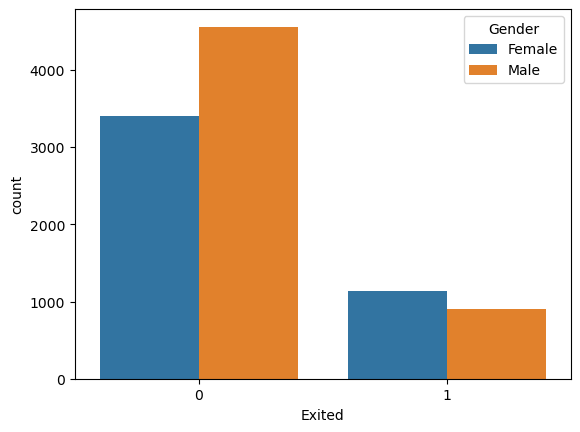

In [8]:
sns.countplot(x='Exited',data=dataset,hue='Gender')

<Axes: xlabel='Exited', ylabel='count'>

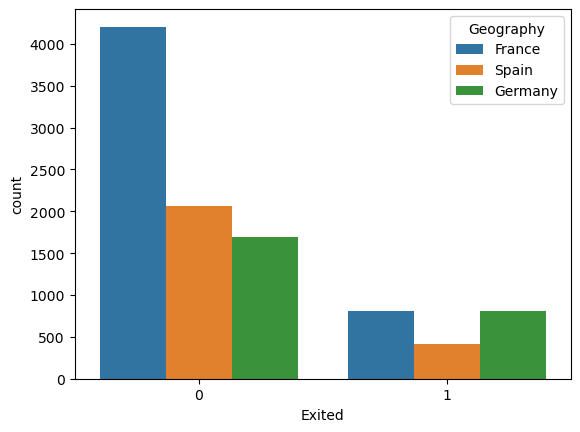

In [9]:
sns.countplot(x='Exited',data=dataset,hue='Geography')

<Axes: xlabel='Exited', ylabel='count'>

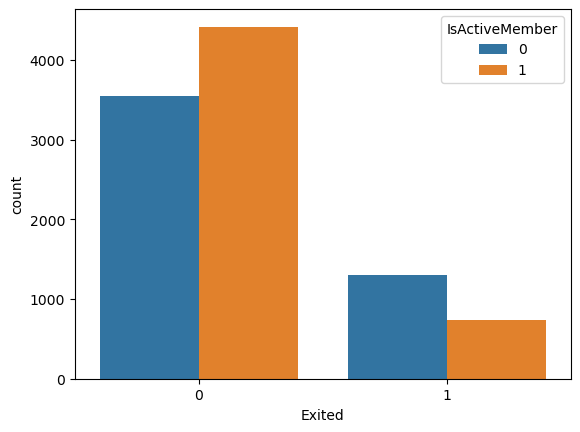

In [10]:
sns.countplot(x='Exited',data=dataset,hue='IsActiveMember')

In [11]:
#Encode the Categorical Columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [12]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [14]:
#Avoiding the Dummy variable Trap
X = X[:, 1:]

In [15]:
print(X)

[[0.0 0.0 619 ... 1 1 101348.88]
 [0.0 1.0 608 ... 0 1 112542.58]
 [0.0 0.0 502 ... 1 0 113931.57]
 ...
 [0.0 0.0 709 ... 0 1 42085.58]
 [1.0 0.0 772 ... 1 0 92888.52]
 [0.0 0.0 792 ... 1 0 38190.78]]


In [16]:
#Number of Features
print(len(X[0]))

11


In [17]:
#Splitting the Dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [18]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
#Building the ANN
from tensorflow.keras.models import Sequential
ann=Sequential()

In [20]:
#Adding the input layer and firs hidden layer
from tensorflow.keras.layers import Dense
ann.add(Dense(units=6,activation='relu',input_shape=(11,)))

In [21]:
#Adding the second hidden layer
ann.add(Dense(units=6,activation='relu'))

In [22]:
#Adding the output layer
ann.add(Dense(units=1,activation='sigmoid'))

In [23]:
#Compiling the ANN
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
#Training the ANN on the training set
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 5ms/step - loss: 0.5582 - accuracy: 0.7564
Epoch 2/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4792 - accuracy: 0.8066
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 0.4489 - accuracy: 0.8124
Epoch 4/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4311 - accuracy: 0.8175
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4214 - accuracy: 0.8194
Epoch 6/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4146 - accuracy: 0.8186
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4091 - accuracy: 0.8216
Epoch 8/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4045 - accuracy: 0.8227
Epoch 9/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3990 - accuracy: 0.8235
Epoch 10/100
250/250 [==============================] - 1s 4ms/step - loss: 0.3933 - accura

In [26]:
#Predict the Test set results
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [27]:
##Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[1518   77]
 [ 203  202]]


0.86